1) Детектирование приступа эпилепсии по данным электроэнцефалограммы (EEG) - извлечение признаков и бинарная классификация. EEG считывает электрические сигналы мозга и позволяет понять, насколько активен мозг в данный момент. Приступ эпилепсии характеризуется аномальной активностью мозга, которую можно попытаться задетектировать при помощи EEG.
2) Скачайте данные из UCI репозитория - https://www.kaggle.com/code/maximkumundzhiev/epileptic-seizure-recognition/input?select=Epileptic+Seizure+Recognition.csv
3) Проведите EDA, а также трансформируйте целевую переменную из многоклассовой в бинарную - класс 1 (приступ) против всех остальных и отложите 20% данных для тестирования (не забудьте про стратификацию).
4) Постройте бейзлайн, используя сырые данные в качестве признаков, без дополнительной предобработки. В качестве модели (или даже моделей) можете выбрать любой полюбившийся вам алгоритм.
5) Так как каждый временной ряд представляет собой сигнал из 178 наблюдений, пришедших за 1 секунду, имеет смысл попробовать методы извлечения признаков из сигналов. Извлеките FFT и Wavelet признаки и снова обучите модель/модели и проверьте качество.
6) Наконец, при помощи библиотеки для автоматического извлечения признаков из временных рядов сгенерируйте статистические признаки и снова проверьте качество моделей.
7) Какой из подходов показал лучшее качество?

# Данные

## Первый взгляд на данные

In [1]:
# Сменим рабочую дирректорию для удобства
import os
os.chdir('/home/slawa/HDD/my_scripts/my_otus/ML_advanced/lesson_14/hw')

In [2]:
# библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv(
    'Epileptic Seizure Recognition.csv',
    index_col='Unnamed',
    delimiter=',',
    decimal='.'
)
raw_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5


In [4]:
null_data = raw_data.isna().sum()
print(*null_data.items(), sep='\n')

('X1', 0)
('X2', 0)
('X3', 0)
('X4', 0)
('X5', 0)
('X6', 0)
('X7', 0)
('X8', 0)
('X9', 0)
('X10', 0)
('X11', 0)
('X12', 0)
('X13', 0)
('X14', 0)
('X15', 0)
('X16', 0)
('X17', 0)
('X18', 0)
('X19', 0)
('X20', 0)
('X21', 0)
('X22', 0)
('X23', 0)
('X24', 0)
('X25', 0)
('X26', 0)
('X27', 0)
('X28', 0)
('X29', 0)
('X30', 0)
('X31', 0)
('X32', 0)
('X33', 0)
('X34', 0)
('X35', 0)
('X36', 0)
('X37', 0)
('X38', 0)
('X39', 0)
('X40', 0)
('X41', 0)
('X42', 0)
('X43', 0)
('X44', 0)
('X45', 0)
('X46', 0)
('X47', 0)
('X48', 0)
('X49', 0)
('X50', 0)
('X51', 0)
('X52', 0)
('X53', 0)
('X54', 0)
('X55', 0)
('X56', 0)
('X57', 0)
('X58', 0)
('X59', 0)
('X60', 0)
('X61', 0)
('X62', 0)
('X63', 0)
('X64', 0)
('X65', 0)
('X66', 0)
('X67', 0)
('X68', 0)
('X69', 0)
('X70', 0)
('X71', 0)
('X72', 0)
('X73', 0)
('X74', 0)
('X75', 0)
('X76', 0)
('X77', 0)
('X78', 0)
('X79', 0)
('X80', 0)
('X81', 0)
('X82', 0)
('X83', 0)
('X84', 0)
('X85', 0)
('X86', 0)
('X87', 0)
('X88', 0)
('X89', 0)
('X90', 0)
('X91', 0)
('X92', 

In [5]:
raw_data.isna().sum().sum()

0

In [6]:
raw_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [7]:
raw_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=179)

In [8]:
raw_data.loc[raw_data['y'] == 1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
X21.V1.724,-167,-230,-280,-315,-338,-369,-405,-392,-298,-140,...,423,434,416,374,319,268,215,165,103,1
X23.V1.964,410,451,491,541,581,641,736,757,692,435,...,415,428,463,510,562,607,667,748,763,1
X11.V1.134,-264,-189,-117,-45,20,70,111,143,161,179,...,-231,-221,-248,-321,-444,-530,-548,-536,-486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X17.V1.874,98,107,121,143,166,184,185,174,153,132,...,-31,11,48,77,95,107,111,110,119,1
X20.V1.494,267,409,450,416,334,248,173,113,67,30,...,413,288,173,76,7,-27,-46,-58,-67,1
X14.V1.404,-22,-64,-121,-201,-292,-336,-398,-527,-773,-1069,...,183,-152,-499,-577,-415,-223,-88,-18,-61,1


In [9]:
raw_data['target'] = 0
raw_data.loc[raw_data.loc[raw_data['y'] == 1].index, 'target'] = 1

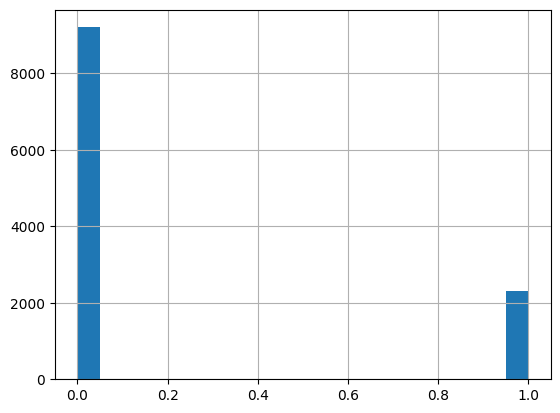

In [10]:
raw_data['target'].hist(bins=20)
plt.show()

In [11]:
raw_data.drop(['y'], axis=1, inplace=True)
raw_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0


In [12]:
# разобъем исходные данные на части и спрячем тестовые данные.
# тестовые данные нам понадоботься только в окончательном тестировании модели
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(raw_data, test_size=0.2, stratify=raw_data['target'])
print(data_train.shape, data_test.shape)
data_train.to_csv('train_data.csv', index=False, sep=',', decimal='.')
data_test.to_csv('test_data.csv', index=False, sep=',', decimal='.')

(9200, 179) (2300, 179)


## Второй взгляд на данные

In [13]:
# Сменим рабочую дирректорию для удобства
import os
os.chdir('/home/slawa/HDD/my_scripts/my_otus/ML_advanced/lesson_14/hw')

In [14]:
# библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv(
    'train_data.csv',
    delimiter=',',
    decimal='.'
)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
0,53,60,61,58,49,43,35,26,20,14,...,21,10,1,5,8,6,11,10,7,0
1,-5,-18,-34,-36,-44,-57,-78,-65,-60,-23,...,76,30,-10,-50,-63,-90,-125,-158,-171,0
2,5,1,-17,-29,-23,-9,-2,-4,-20,-25,...,97,109,110,112,104,90,59,30,16,0
3,-76,-55,-60,-78,-112,-122,-134,-137,-149,-159,...,87,116,116,96,64,38,16,-1,-22,0
4,-20,-21,-36,-45,-52,-53,-46,-39,-28,-18,...,-28,-31,-28,-26,-36,-35,-28,-31,-28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,-53,-59,-70,-91,-98,-98,-85,-67,-50,-31,...,50,64,62,45,38,32,54,54,69,0
9196,56,69,69,52,11,-12,-3,-6,3,27,...,-40,-34,-57,-78,-102,-127,-118,-82,-52,0
9197,67,64,51,26,7,-6,-4,-9,-11,-23,...,10,-5,-17,-27,-57,-69,-56,-32,-7,0
9198,-91,-72,-67,-58,-60,-57,-48,-49,-46,-43,...,-89,-87,-83,-89,-83,-80,-73,-61,-50,0


In [16]:
numeric_col = list(df.columns)
numeric_col.remove('target')
target_col = ['target']

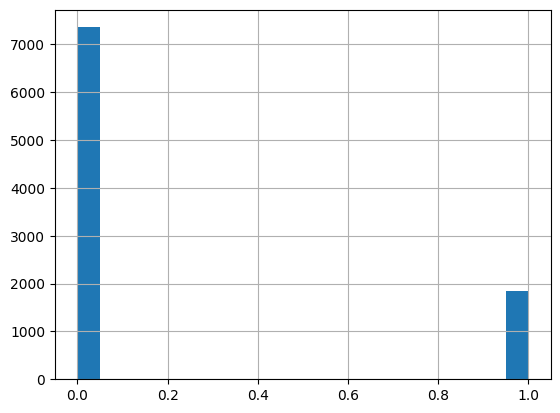

In [17]:
df['target'].hist(bins=20)
plt.show()

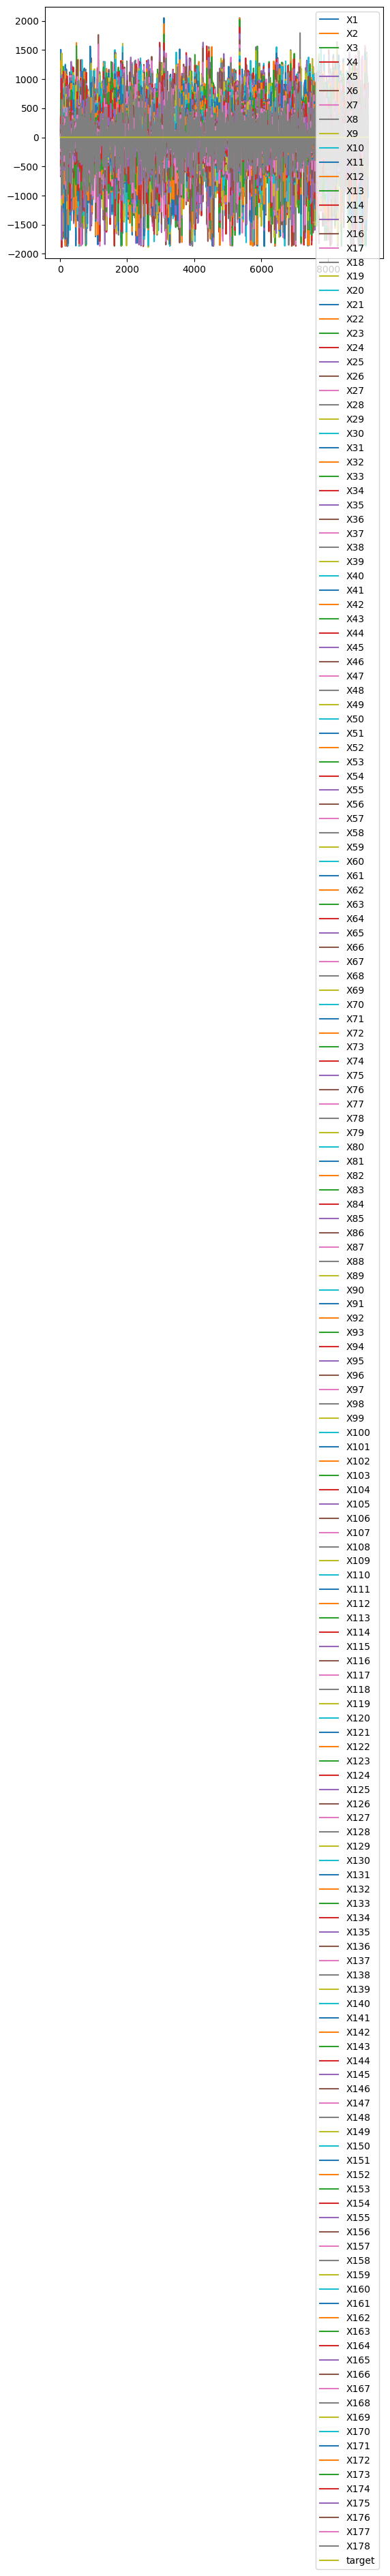

In [18]:
df.loc[df['target'] == 1].plot()
plt.show()

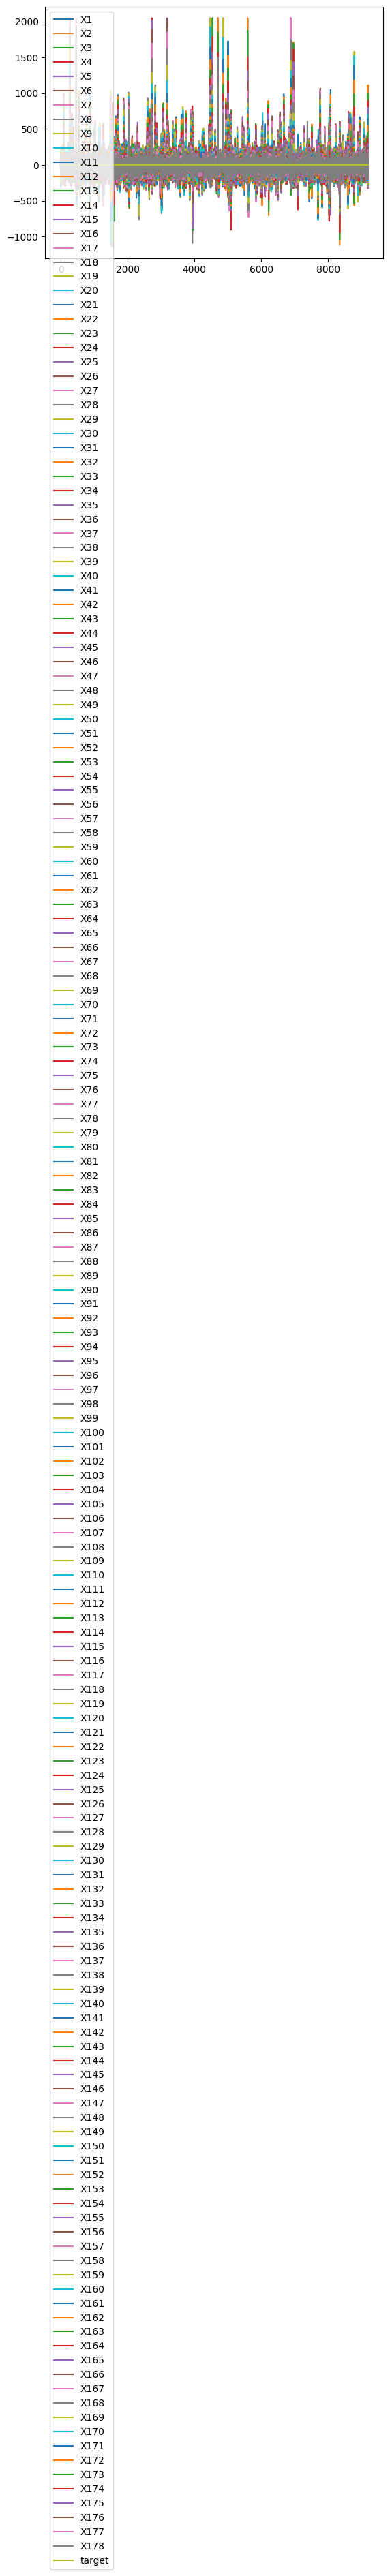

In [19]:
df.loc[df['target'] == 0].plot()
plt.show()

In [20]:
# собираем данные для обучения
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['target'])
X_train = df_train[numeric_col]
Y_train = df_train[target_col].to_numpy()
X_test= df_test[numeric_col]
Y_test = df_test[target_col].to_numpy()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(7360, 178) (7360, 1)
(1840, 178) (1840, 1)


## Бейзлайн

In [21]:
# Сменим рабочую дирректорию для удобства
import os
os.chdir('/home/slawa/HDD/my_scripts/my_otus/ML_advanced/lesson_14/hw')

In [22]:
# библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import xgboost

In [23]:
# собираем конвейер
data_transformer = ColumnTransformer(
    [
        ('scaler', StandardScaler(), numeric_col)
    ]
)
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

In [24]:
# собираем и обучаем случайный лес
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', RandomForestClassifier())])
classifier_pipline
classifier_pipline.fit(X_train, Y_train)

/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('scaler',
                                                                   StandardScaler(),
                                                                   ['X1', 'X2',
                                                                    'X3', 'X4',
                                                                    'X5', 'X6',
                                                                    'X7', 'X8',
                                                                    'X9', 'X10',
                                                                    'X11',
                                                                    'X12',
                                                                    'X13',
                                                                    'X14',
                                                                    'X15',
                                                                    'X16',
                                                                    'X17',
                                                                    'X18',
                                                                    'X19',
                                                                    'X20',
                                                                    'X21',
                                                                    'X22',
                                                                    'X23',
                                                                    'X24',
                                                                    'X25',
                                                                    'X26',
                                                                    'X27',
                                                                    'X28',
                                                                    'X29',
                                                                    'X30', ...])]))])),
                ('classifier', RandomForestClassifier())])

In [25]:
# проверяем
preds = classifier_pipline.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1472
           1       0.94      0.93      0.94       368

    accuracy                           0.97      1840
   macro avg       0.96      0.96      0.96      1840
weighted avg       0.97      0.97      0.97      1840



In [26]:
# Хм....
# А если на тестовых?
data_test = pd.read_csv(
    'test_data.csv',
    delimiter=',',
    decimal='.'
)

# проверяем
preds = classifier_pipline.predict(data_test[numeric_col])
print(classification_report(data_test[target_col].to_numpy(), preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1840
           1       0.94      0.91      0.93       460

    accuracy                           0.97      2300
   macro avg       0.96      0.95      0.95      2300
weighted avg       0.97      0.97      0.97      2300



# Попробуем FFT, PSD, autocorr

In [27]:
# библиотеки
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import welch, find_peaks

In [28]:
# константы
# исходя из описания датасета получаем:
# каждая строка состоит из 178-ми записей, которые представляют 1 секунду
SAMPLE_RATE = len(X_train.columns)
DURATION = 1


In [29]:
# функции
def get_fft_values(signal, duration, sample_rate):
    N = sample_rate * duration
    yf = 2 / N * np.abs(rfft(signal))
    return yf

def get_psd_values(signal, sample_rate):
    _, psd_values = welch(signal, fs=sample_rate, nperseg=signal.shape[0])
    return psd_values

def autocorr(signal):
    result = np.correlate(signal, signal, mode='full')
    return result[len(result)//2:]

def normalize_size_array(array, size):
    array = array[:size]
    feature_array = np.full((size,), -1)
    feature_array[:array.shape[0]] = array
    return feature_array

def get_new_feature(signal, duration, sample_rate, feature_count):
    fft_values = get_fft_values(signal, duration, sample_rate)
    psd_values = get_psd_values(signal, sample_rate)
    autocorr_values = autocorr(signal)
    result = np.concatenate(
        [
            normalize_size_array(find_peaks(fft_values)[0][:feature_count], feature_count),
            normalize_size_array(find_peaks(psd_values)[0][:feature_count], feature_count),
            normalize_size_array(find_peaks(autocorr_values)[0][:feature_count], feature_count),
        ], 
        axis=0
    )
    return result

In [30]:
# Собираем новые фичи (10 пиков)
PEAKS_COUNT = 10

new_X_train = []
for sig in X_train.to_numpy():
    result = get_new_feature(sig, DURATION, SAMPLE_RATE, PEAKS_COUNT)
    new_X_train.append(result)
new_X_train = np.array(new_X_train)
print(new_X_train.shape)

new_X_test = []
for sig in X_test.to_numpy():
    result = get_new_feature(sig, DURATION, SAMPLE_RATE, PEAKS_COUNT)
    new_X_test.append(result)
new_X_test = np.array(new_X_test)
print(new_X_test.shape)

(7360, 30)
(1840, 30)


In [31]:
# собираем конвейер
data_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

In [32]:
# собираем и обучаем случайный лес
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', RandomForestClassifier())])
classifier_pipline
classifier_pipline.fit(new_X_train, Y_train)

/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  Pipeline(steps=[('scaler',
                                                   StandardScaler())]))])),
                ('classifier', RandomForestClassifier())])

In [33]:
# проверяем
preds = classifier_pipline.predict(new_X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1472
           1       0.81      0.38      0.52       368

    accuracy                           0.86      1840
   macro avg       0.84      0.68      0.72      1840
weighted avg       0.85      0.86      0.84      1840



Результат хуже

# Пробуем Wavelet

In [59]:
import pywt

In [60]:
# Собираем новые фичи

new_X_train = []
for sig in X_train.to_numpy():
    result, _ = pywt.dwt(sig, 'haar')
    new_X_train.append(result)
new_X_train = np.array(new_X_train)
print(new_X_train.shape)

new_X_test = []
for sig in X_test.to_numpy():
    result, _ = pywt.dwt(sig, 'haar')
    new_X_test.append(result)
new_X_test = np.array(new_X_test)
print(new_X_test.shape)

(7360, 89)
(1840, 89)


In [61]:
# собираем конвейер
data_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

In [62]:
# собираем и обучаем случайный лес
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', RandomForestClassifier())])
classifier_pipline
classifier_pipline.fit(new_X_train, Y_train)

/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  Pipeline(steps=[('scaler',
                                                   StandardScaler())]))])),
                ('classifier', RandomForestClassifier())])

In [63]:
# проверяем
preds = classifier_pipline.predict(new_X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1472
           1       0.95      0.93      0.94       368

    accuracy                           0.98      1840
   macro avg       0.97      0.96      0.96      1840
weighted avg       0.98      0.98      0.98      1840



Воот! Мы улучшились, плюс сократили количество фичей в два раза. 